In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import json
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
nonpdata = np.load('NONP_TEST.npy',allow_pickle=True)
pdata = np.load('PULSAR_TEST.npy',allow_pickle=True)

In [4]:
nonpdatadict = nonpdata[()]
pdatadict = pdata[()]

In [5]:
pdatadict.keys()

dict_keys(['Subband', 'DM Plots', 'Persistence', 'Sum Prof', 'Train Labels', 'RA', 'DEC', 'p1', 'p2', 'p3', 'Best DM', 'Chi2', 'Max DM'])

In [6]:
nonpsub = nonpdatadict['Subband']
psub = pdatadict['Subband']

In [7]:
nonplabels = nonpdatadict['Train Labels']
plabels = pdatadict['Train Labels']

In [50]:
nonpdm = nonpdatadict['DM Plots']
pdm = pdatadict['DM Plots']

In [59]:
nonppersist = nonpdatadict['Persistence']
ppersist = pdatadict['Persistence']

In [69]:
nonpprof= nonpdatadict['Sum Prof']
pprof = pdatadict['Sum Prof']

In [70]:
np.shape(pprof)

(1000, 200)

In [55]:
pdm = pdm[0]

TypeError: Invalid shape (200,) for image data

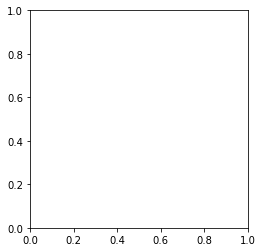

In [71]:
plt.imshow(pprof[12])

ValueError: x and y must have same first dimension, but have shapes (200,) and (128,)

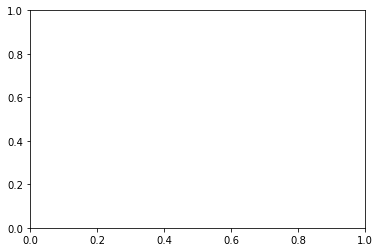

In [33]:
plt.plot(psub[0][0],psub[0][:,0])

In [18]:
totalpsub = np.array
totallabels = np.array

In [19]:
totalpsub = np.concatenate((nonpsub,psub))
totalplabels = np.concatenate((nonplabels,plabels))

In [20]:
np.shape(totalpsub)

(2000, 128, 200)

In [10]:
np.shape(totalplabels)

(2000,)

In [11]:
savedmodel = tf.keras.models.load_model('subband_resnet_best_model')

/opt/anaconda3/lib/python3.8/site-packages/keras/layers/core/lambda_layer.py:327: UserWarning: kerastuner.applications.resnet is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


In [12]:
savedmodel.summary()

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 200, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 206, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 100, 64)  3136        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 100, 64)  256         ['conv1_conv[0][0]']        

 conv2_block2_2_bn (BatchNormal  (None, 16, 25, 64)  256         ['reshape_3[0][0]']              
 ization)                                                                                         
                                                                                                  
 conv2_block2_2_relu (Activatio  (None, 16, 25, 64)  0           ['conv2_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block2_3_conv (Conv2D)   (None, 16, 25, 128)  8192        ['conv2_block2_2_relu[0][0]']    
                                                                                                  
 conv2_block2_3_bn (BatchNormal  (None, 16, 25, 128)  512        ['conv2_block2_3_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block1_3_conv (Conv2D)   (None, 8, 13, 512)   131072      ['conv3_block1_2_relu[0][0]']    
                                                                                                  
 conv3_block1_0_bn (BatchNormal  (None, 8, 13, 512)  2048        ['conv3_block1_0_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_3_bn (BatchNormal  (None, 8, 13, 512)  2048        ['conv3_block1_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_add (Add)         (None, 8, 13, 512)   0           ['conv3_block1_0_bn[0][0]',      
          

 ization)                                                                                         
                                                                                                  
 conv3_block3_add (Add)         (None, 8, 13, 512)   0           ['conv3_block2_out[0][0]',       
                                                                  'conv3_block3_3_bn[0][0]']      
                                                                                                  
 conv3_block3_out (Activation)  (None, 8, 13, 512)   0           ['conv3_block3_add[0][0]']       
                                                                                                  
 conv3_block4_1_conv (Conv2D)   (None, 8, 13, 256)   131072      ['conv3_block3_out[0][0]']       
                                                                                                  
 conv3_block4_1_bn (BatchNormal  (None, 8, 13, 256)  1024        ['conv3_block4_1_conv[0][0]']    
 ization) 

 conv3_block6_1_conv (Conv2D)   (None, 8, 13, 256)   131072      ['conv3_block5_out[0][0]']       
                                                                                                  
 conv3_block6_1_bn (BatchNormal  (None, 8, 13, 256)  1024        ['conv3_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 8, 13, 256)  0           ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_pad (ZeroPaddin  (None, 10, 15, 256)  0          ['conv3_block6_1_relu[0][0]']    
 g2D)                                                                                             
          

                                                                                                  
 conv3_block8_2_pad (ZeroPaddin  (None, 10, 15, 256)  0          ['conv3_block8_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_block8_2_conv (Depthwise  (None, 8, 13, 2048)  18432      ['conv3_block8_2_pad[0][0]']     
 Conv2D)                                                                                          
                                                                                                  
 reshape_20 (Reshape)           (None, 8, 13, 32, 8  0           ['conv3_block8_2_conv[0][0]']    
                                , 8)                                                              
                                                                                                  
 conv3_blo

 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Depthwise  (None, 4, 7, 8192)  73728       ['conv4_block2_2_pad[0][0]']     
 Conv2D)                                                                                          
                                                                                                  
 reshape_24 (Reshape)           (None, 4, 7, 32, 16  0           ['conv4_block2_2_conv[0][0]']    
                                , 16)                                                             
                                                                                                  
 conv4_block2_2_reduce (Lambda)  (None, 4, 7, 32, 16  0          ['reshape_24[0][0]']             
                                )                                                                 
          

                                                                                                  
 conv4_block4_2_reduce (Lambda)  (None, 4, 7, 32, 16  0          ['reshape_28[0][0]']             
                                )                                                                 
                                                                                                  
 reshape_29 (Reshape)           (None, 4, 7, 512)    0           ['conv4_block4_2_reduce[0][0]']  
                                                                                                  
 conv4_block4_2_bn (BatchNormal  (None, 4, 7, 512)   2048        ['reshape_29[0][0]']             
 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 4, 7, 512)   0           ['conv4_block4_2_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 4, 7, 512)   0           ['conv4_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, 4, 7, 1024)   524288      ['conv4_block6_2_relu[0][0]']    
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, 4, 7, 1024)  4096        ['conv4_block6_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv5_block2_2_relu (Activatio  (None, 4, 7, 1024)  0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 7, 2048)   2097152     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 7, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [13]:
predictedmodel = savedmodel.predict(totalpsub)

63/63 [==============================] - 66s 1s/step


In [14]:
falsepos, truepos, thresholds = metrics.roc_curve(totalplabels,predictedmodel[:,1])

In [15]:
print(predictedmodel)

[[6.7838409e-05 9.9993217e-01]
 [9.9896169e-01 1.0382634e-03]
 [4.7194619e-05 9.9995279e-01]
 ...
 [8.8306592e-07 9.9999917e-01]
 [9.0891217e-06 9.9999094e-01]
 [6.3495236e-07 9.9999940e-01]]


In [18]:
print(predictedmodel[0][1])

0.99993217


In [20]:
np.sum(predictedmodel[:,0] + predictedmodel[:,1])

2000.0

In [16]:
print('AUC score:',metrics.roc_auc_score(totalplabels,predictedmodel[:,1]))
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
display.plot()
plt.plot([0,1],[0,1],"r--")

AUC score: 0.647176


In [45]:
np.shape(predictedmodel[[1]])

(1, 2)

In [23]:
print(predictedmodel)

[[6.7838409e-05 9.9993217e-01]
 [9.9896169e-01 1.0382634e-03]
 [4.7194619e-05 9.9995279e-01]
 ...
 [8.8306592e-07 9.9999917e-01]
 [9.0891217e-06 9.9999094e-01]
 [6.3495236e-07 9.9999940e-01]]


In [40]:
predictedmodel[:,0].shape

(2000,)

In [38]:
type(predictedmodel)

numpy.ndarray